## K-means clustering in Scipy

In [61]:
from scipy.cluster.vq import vq, whiten, kmeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [62]:
df = pd.read_csv('Chelsea_Existing.csv')

In [63]:
df.head()

,Length (m),Angle
0,261.7,36.8
1,34.6,36.4
2,197.0,127.8
3,202.5,126.5
4,13.2,40.4


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
Length (m)    156 non-null float64
Angle         156 non-null float64
dtypes: float64(2)
memory usage: 2.6 KB


In [65]:
df.dtypes

Length (m)    float64
Angle         float64
dtype: object

Text(0, 0.5, 'Angle')

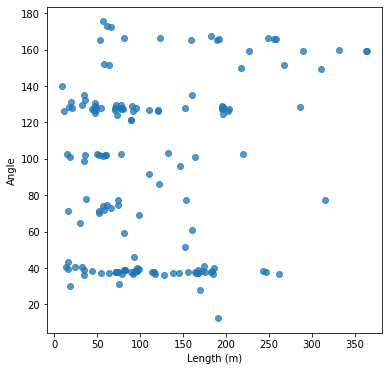

In [66]:
plt.figure(figsize=(6, 6))
plt.scatter(df[['Length (m)']], df[['Angle']], alpha=0.75)
plt.xlabel('Length (m)')
plt.ylabel('Angle')

In [67]:
mms = MinMaxScaler()
df_scaled = df.copy()
df_scaled[['Length (m)', 'Angle']] = mms.fit_transform(df[['Length (m)', 'Angle']])
df_scaled.head()

,Length (m),Angle
0,0.710741,0.148649
1,0.070482,0.146192
2,0.528334,0.707617
3,0.543840,0.699631
4,0.010149,0.170762


Text(0, 0.5, 'Angle')

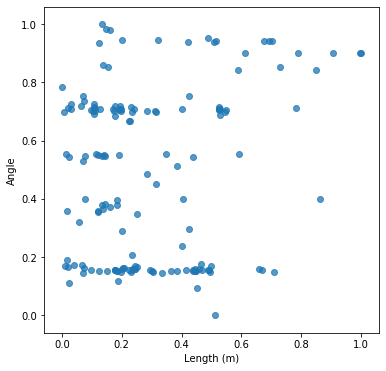

In [68]:
plt.figure(figsize=(6, 6))
plt.scatter(df_scaled[['Length (m)']], df_scaled[['Angle']], alpha=0.75)
plt.xlabel('Length (m)')
plt.ylabel('Angle')

In [69]:
scaled_X = df_scaled.to_numpy()

Distortion: Calculated as the average of the squared distances from the cluster centers of the respective clusters. Euclidean distance metric used.

Inertia: Sum of squared distances of samples to their closest cluster center.

In [70]:
#Standard Euclidean KMeans
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #fitting the model for K = 1 to K = 10 
    kmeansModel = KMeans(n_clusters=k).fit(scaled_X) 
    kmeansModel.fit(scaled_X)     
      
    distortions.append(sum(np.min(cdist(scaled_X, kmeansModel.cluster_centers_, 'euclidean'),axis=1)) / scaled_X.shape[0]) 
    inertias.append(kmeansModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(scaled_X, kmeansModel.cluster_centers_, 'euclidean'),axis=1)) / scaled_X.shape[0] 
    mapping2[k] = kmeansModel.inertia_ 

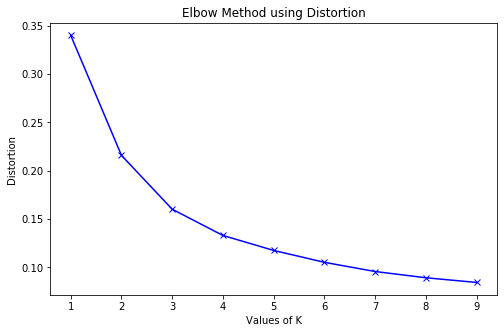

In [71]:
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('Elbow Method using Distortion') 
plt.show() 

In [72]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

1 : 20.82524050957108
2 : 9.667102635058578
3 : 5.29286815844816
4 : 3.74494798818328
5 : 3.0245681263326034
6 : 2.3909270123737274
7 : 2.061147060625734
8 : 1.7699684189416094
9 : 1.506371920958006


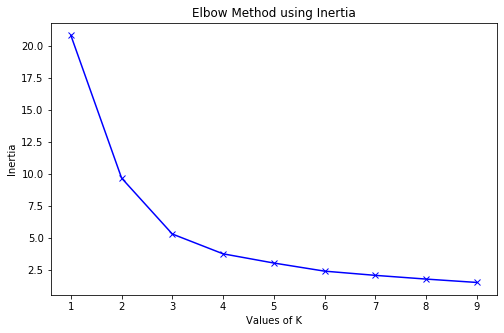

In [73]:
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('Elbow Method using Inertia') 
plt.show() 

3 seems like a reasonable cluster size based on distortion and inertia

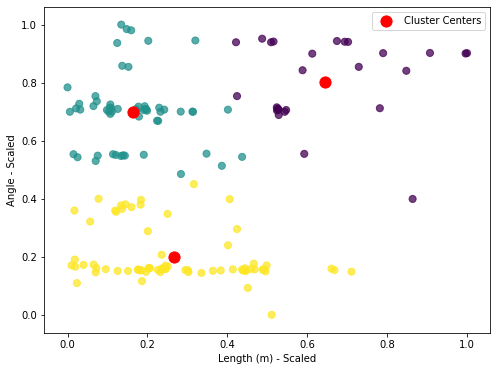

In [74]:
kmeans3 = KMeans(n_clusters=3).fit(scaled_X) 
kmeans3.fit(scaled_X)  
clusters3_kmeans = kmeans3.predict(scaled_X)

plt.figure(figsize=(8, 6))
plt.scatter(scaled_X[:, 0], scaled_X[:, 1], c=clusters3_kmeans, s=50, cmap='viridis', alpha=0.75)
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s=125, c='red', label='Cluster Centers')
plt.legend()
plt.xlabel('Length (m) - Scaled')
plt.ylabel('Angle - Scaled')
plt.show()

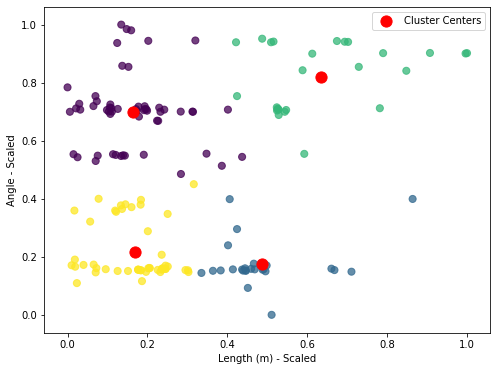

In [75]:
kmeans4 = KMeans(n_clusters=4).fit(scaled_X) 
kmeans4.fit(scaled_X)  
clusters4_kmeans = kmeans4.predict(scaled_X)

plt.figure(figsize=(8, 6))
plt.scatter(scaled_X[:, 0], scaled_X[:, 1], c=clusters4_kmeans, s=50, cmap='viridis', alpha=0.75)
plt.scatter(kmeans4.cluster_centers_[:, 0], kmeans4.cluster_centers_[:, 1], s=125, c='red', label='Cluster Centers')
plt.legend()
plt.xlabel('Length (m) - Scaled')
plt.ylabel('Angle - Scaled')
plt.show()

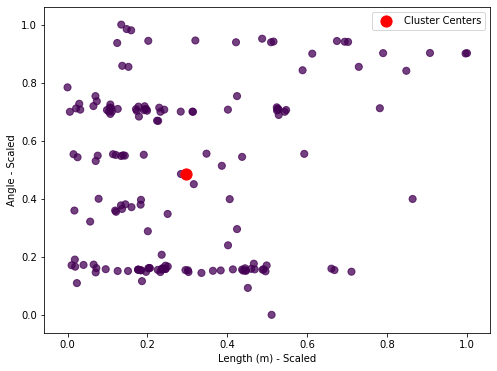

In [76]:
kmeans1 = KMeans(n_clusters=1).fit(scaled_X) 
kmeans1.fit(scaled_X)  
clusters1_kmeans = kmeans1.predict(scaled_X)

plt.figure(figsize=(8, 6))
plt.scatter(scaled_X[:, 0], scaled_X[:, 1], c=clusters1_kmeans, s=50, cmap='viridis', alpha=0.75)
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s=125, c='red', label='Cluster Centers')
plt.legend()
plt.xlabel('Length (m) - Scaled')
plt.ylabel('Angle - Scaled')
plt.show()

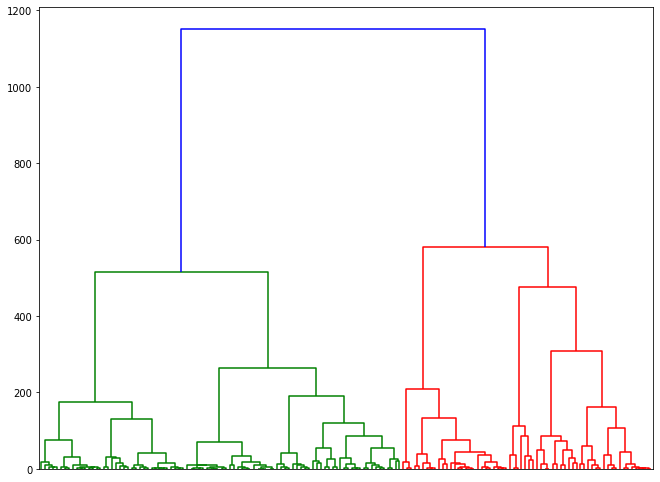

In [77]:
# Agglomerative clustering on Chelsea Current
import scipy.cluster.hierarchy as hac
from scipy.spatial.distance import pdist

plt.figure(figsize=(11,8.5))
dist_mat = pdist(df, metric="euclidean")
df = hac.ward(dist_mat)

hac.dendrogram(df,no_labels=True);
plt.show()

In [78]:
df = pd.read_csv('team1.csv')

In [79]:
mms = MinMaxScaler()
df_scaled = df.copy()
df_scaled[['Length (m)', 'Angle']] = mms.fit_transform(df[['Length (m)', 'Angle']])
df_scaled.head()

,Length (m),Angle
0,0.649575,0.148649
1,0.064416,0.146192
2,0.482865,0.707617
3,0.497037,0.699631
4,0.009276,0.170762


Text(0, 0.5, 'Angle')

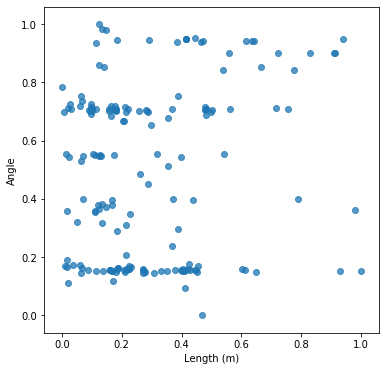

In [80]:
plt.figure(figsize=(6, 6))
plt.scatter(df_scaled[['Length (m)']], df_scaled[['Angle']], alpha=0.75)
plt.xlabel('Length (m)')
plt.ylabel('Angle')

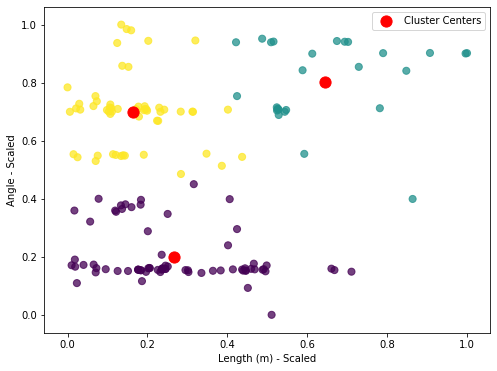

In [81]:
kmeans3 = KMeans(n_clusters=3).fit(scaled_X) 
kmeans3.fit(scaled_X)  
clusters3_kmeans = kmeans3.predict(scaled_X)

plt.figure(figsize=(8, 6))
plt.scatter(scaled_X[:, 0], scaled_X[:, 1], c=clusters3_kmeans, s=50, cmap='viridis', alpha=0.75)
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s=125, c='red', label='Cluster Centers')
plt.legend()
plt.xlabel('Length (m) - Scaled')
plt.ylabel('Angle - Scaled')
plt.show()

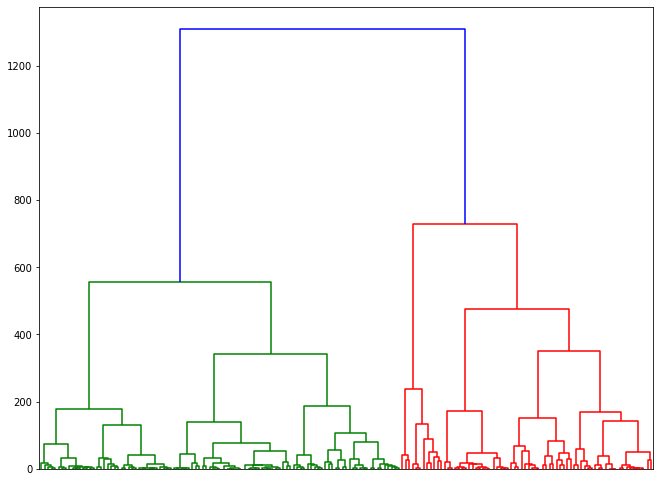

In [82]:
# Agglomerative clustering on Chelsea TEAM 1
import scipy.cluster.hierarchy as hac
from scipy.spatial.distance import pdist

plt.figure(figsize=(11,8.5))
dist_mat = pdist(df, metric="euclidean")
df = hac.ward(dist_mat)

hac.dendrogram(df,no_labels=True);
plt.show()